In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
def cleandata(data):
    df = data.copy()
    
    df["VIP"] = df["VIP"].astype(bool)
    df["VIP"] = df["VIP"].astype(int)
    
    df["CryoSleep"] = df["CryoSleep"].astype(bool)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    #df["Transported"] = df["Transported"].astype(int)
    
    df[['deck','num','side']] = df['Cabin'].str.split('/',expand=True)
    df["num"] = df["num"].astype(float)
    
    df.drop(['PassengerId', 'Name', 'Cabin'],axis=1,inplace=True)
    
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
    df['side'] = df['side'].fillna(df['side'].mode()[0])
    
    df['num'] = df['num'].fillna(df['num'].mean())
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
    df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())
    df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
    df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
    df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
    
    df['deck'] = df['deck'].replace(['A','B','C','D','E','F','G','T'], [10,20,30,40,50,60,70,80])
    df['side'] = df['side'].replace(['P','S'], [0,1])
    
    df = pd.get_dummies(df, columns=['HomePlanet','Destination'], drop_first=False)
    
    return df

In [4]:
train_df = cleandata(train)

In [9]:
train_df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'deck', 'num', 'side',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
traindf = scaler.fit_transform(train_df)

In [10]:
traindf = pd.DataFrame(traindf, columns=train_df.columns)

In [11]:
traindf

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,-0.773480,0.709437,-0.220196,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-1.007274,-1.886321,-1.186627,-1.032865,-1.111173,1.754795,-0.503664,-0.511013,-0.317487,0.652521
1,-0.773480,-0.336717,-0.220196,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,0.992779,0.385470,-1.186627,0.968181,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521
2,-0.773480,2.034566,4.541407,-0.275409,1.955616,-0.290817,5.694289,-0.225782,-1.007274,-2.454269,-1.186627,0.968181,-1.111173,1.754795,-0.503664,-0.511013,-0.317487,0.652521
3,-0.773480,0.290975,-0.220196,-0.340590,0.517406,0.330225,2.683471,-0.098708,-1.007274,-2.454269,-1.186627,0.968181,-1.111173,1.754795,-0.503664,-0.511013,-0.317487,0.652521
4,-0.773480,-0.894666,-0.220196,0.118709,-0.243409,-0.038048,0.225732,-0.267258,0.992779,0.385470,-1.184651,0.968181,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.773480,0.848924,4.541407,-0.340590,3.989682,-0.290817,1.184286,-0.203720,-1.007274,-2.454269,-0.992930,-1.032865,-1.111173,1.754795,-0.503664,1.956897,-0.317487,-1.532519
8689,1.292858,-0.755179,-0.220196,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-1.007274,0.953418,1.776147,0.968181,0.899950,-0.569867,-0.503664,-0.511013,3.149739,-1.532519
8690,-0.773480,-0.197230,-0.220196,-0.340590,-0.287314,2.842851,-0.275774,-0.269023,0.992779,0.953418,1.778124,0.968181,0.899950,-0.569867,-0.503664,-0.511013,-0.317487,0.652521
8691,-0.773480,0.221232,-0.220196,-0.340590,0.370637,-0.290817,0.037223,2.585740,-1.007274,-0.182478,0.015085,0.968181,-1.111173,1.754795,-0.503664,1.956897,-0.317487,-1.532519


<AxesSubplot:>

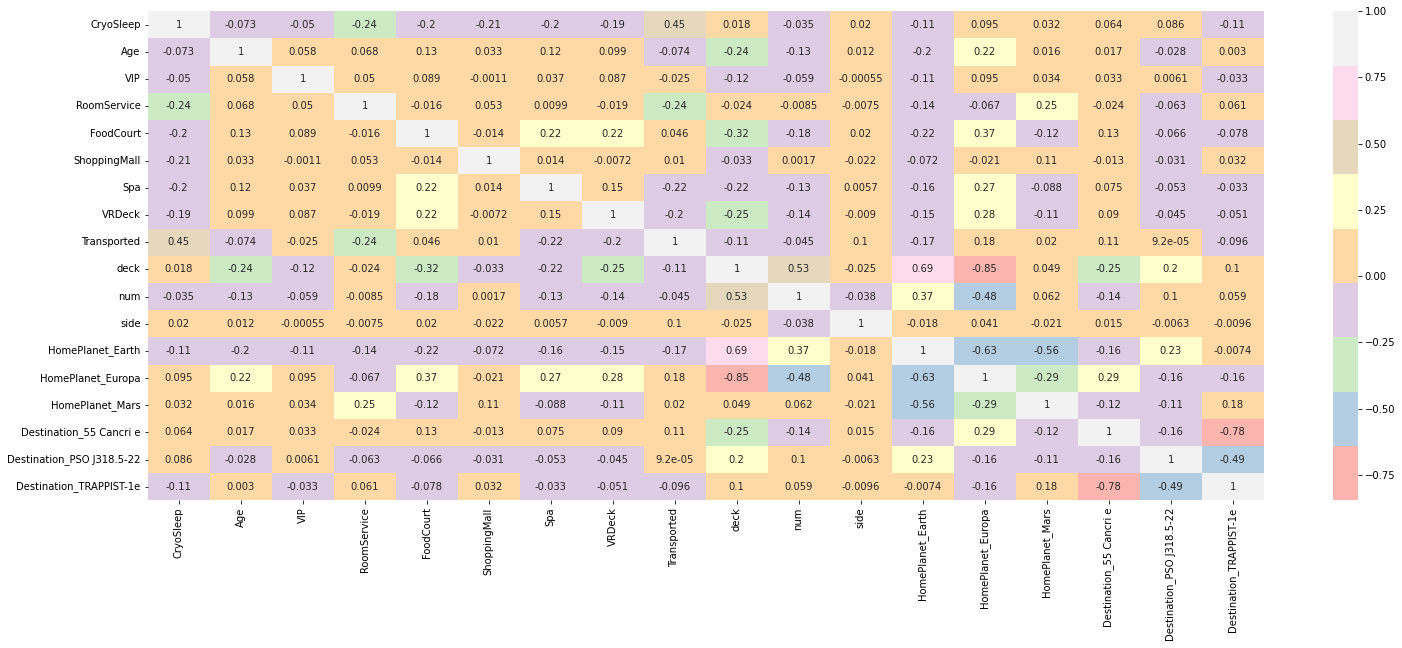

In [12]:
plt.figure(figsize=(25, 9))
sns.heatmap(traindf[[f'{feature}' for feature in traindf.columns]].corr(),annot=True ,cmap = "Pastel1")

In [17]:
X_train = traindf.drop(['Transported'], axis=1)
y_train = train_df['Transported']

In [18]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [19]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [22]:
test = pd.read_csv('test.csv')
test_df = cleandata(test)
testdf = scaler.fit_transform(test_df)
testdf = pd.DataFrame(testdf, columns=test_df.columns)

In [24]:
y_preds = classifier.predict(testdf)

In [25]:
y_preds

array([1, 0, 1, ..., 1, 1, 0])

In [29]:
subdf = pd.DataFrame({'PassengerId':test['PassengerId'],
                     'Transported':y_preds})
subdf['Transported'] = subdf['Transported'].astype(bool)

In [30]:
subdf.to_csv('sub04.csv', index=False)